# Analysis of Kaggle's Titanic Dataset
Author: Daniel Pipkin

Write something about the Titanic here. The dataset contains demographic and passenger information about passengers on the Titanic.

In [1]:
# Make plots show up in the notebook
%matplotlib inline

# Import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

# Bring an artist's touch to matplotlib's default styles
style.use('seaborn-pastel')

## Posing Questions

The two questions we are mainly focusing on:
* What factors made people more likely to survive? (Women, Children, Upper Class)
    More Women survived. What about children? More first-class passengers survived. Is there an alternative explanation.
* Was ticket price based on more than passenger class?

To answer these questions, I'm going to follow a simple loop:
1. Hypothesize an explanation for the question.
2. Gather items needed to investigate the hypothesis.
3. Investigate the relationship with one or more visualizations.
4. Draw a conclusion, then pose another hypothesis for further investigation.

## "I'll never let go, Jack!"

So what factors did contribute to the survival of some passengers? The one thing I remember from Titanic is that Jack dies and Rose lives. (That, and Leonardo Decaprio toasting like [he does in every movie](http://www.vulture.com/2013/06/gif-history-of-leo-dicaprio-raising-glasses.html)). Let's use this as a starting point.  
**Hypothesis:** Women survived more than men  
Now it's time to gather the needed information.

In [2]:
# Import the titanic data
titanic_data = pd.read_csv('titanic-data.csv')

This is what the first couple rows of data looks like.

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


It seems like the `Sex` column uses '`male`' and '`female`' values. Let's make sure that looks right.

In [4]:
titanic_data['Sex'].unique()

array(['male', 'female'], dtype=object)

Great! No surprises there. Now let's see how many of each group survived.

In [5]:
# Kaggle's website talks about the meaning of the
# 'Survived' column here: https://www.kaggle.com/c/titanic/data
# -- 1 means they made it.
titanic_data.loc[titanic_data['Survived'] == 1, 'Sex'] \
            .value_counts()

female    233
male      109
Name: Sex, dtype: int64

Wow! More than twice as many women survived than men, but it's much easier to notice those types of relationships in a chart.

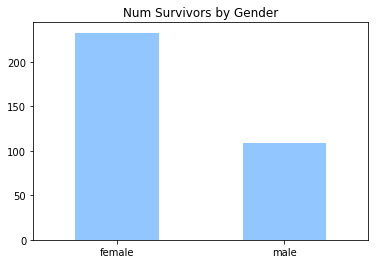

In [6]:
titanic_data.loc[titanic_data['Survived'] == 1, 'Sex'] \
            .value_counts() \
            .plot(kind='bar', rot=0)
plt.title('Num Survivors by Gender')
plt.savefig('figures/num_survivors_by_gender.png')

But this might be deceptive. Maybe there were just more women on the titanic.

In [19]:
def pipe_print(x):
    print(x)
    return x

female    314
male      577
Name: Sex, dtype: int64


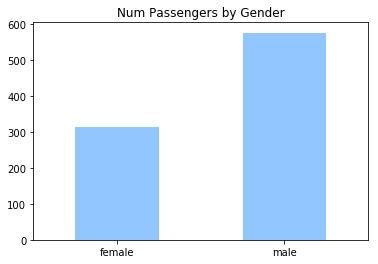

In [20]:
titanic_data['Sex'].value_counts() \
                   .sort_index() \
                   .pipe(pipe_print) \
                   .plot(kind='bar', rot=0)
plt.title('Num Passengers by Gender')
plt.savefig('figures/num_by_gender.png')

Normalize view so that it represents proportion of population

Sex
female    0.742038
male      0.188908
Name: 1, dtype: float64

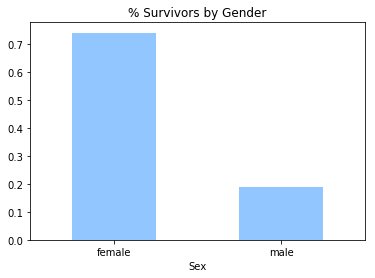

In [9]:
def percent_survived(group, by='Survived', df=titanic_data):
    return pd.crosstab(df[group], df[by], normalize=0) \
             .loc[:, 1]

normalized_mf_survivors = percent_survived('Sex')
normalized_mf_survivors.plot(kind='bar', rot='0')
plt.title('% Survivors by Gender')
plt.savefig('figures/per_survivors_by_gender.png')
normalized_mf_survivors

It looks like an even higher percentage of females survived compared to males

## Women and Children First

Let's see how men, women, and children compare.

MWCh
child     0.591549
female    0.757143
male      0.162963
Name: 1, dtype: float64


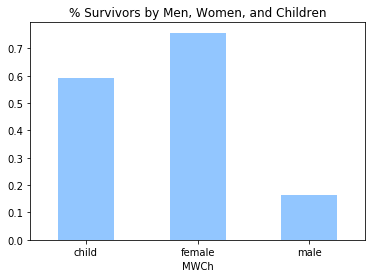

In [10]:
def to_mwch(df):
    if df['Age'] < 14:
        return 'child'
    else:
        return df['Sex']

titanic_data.assign(MWCh=lambda x: \
                            x.apply(to_mwch, axis=1)) \
            .pipe((percent_survived, 'df'), 'MWCh') \
            .pipe(pipe_print) \
            .plot(kind='bar', rot='0')

plt.title('% Survivors by Men, Women, and Children')
plt.savefig('figures/per_survivors_mwch.png')

## Stay classy 1912
> Woman: I didn't know we had a king!  I thought we were autonomous collective.  
> Dennis: You're fooling yourself!  We're living in a dictatorship!  A self-perpetuating autocracy in which the working **classes**--  
> Woman: There you go, bringing **class** into it again...  

Women and children first, but maybe class had something to do with it too. The lower class may have some injuries and would have been helped.

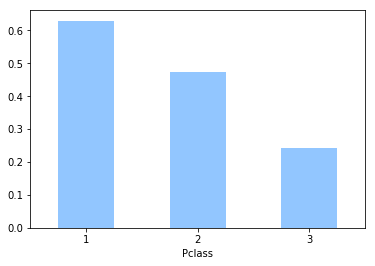

In [11]:
percent_survived('Pclass').plot(kind='bar', rot=0)

## Cabin
Maybe their deck had something to do with it.

In [12]:
def to_deck(cabin):
    if pd.isnull(cabin):
        return 'No Info'
    else:
        return cabin[0]

Deck
A          0.466667
B          0.744681
C          0.593220
D          0.757576
E          0.750000
F          0.615385
G          0.500000
T          0.000000
No Info    0.299854
Name: 1, dtype: float64


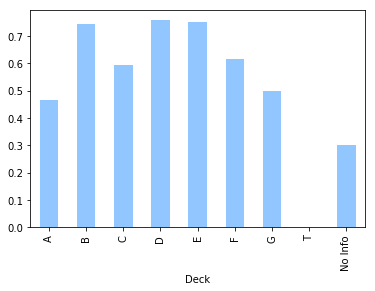

In [13]:
# titanic_data['Cabin'].apply(to_deck)
titanic_data.assign(Deck=lambda x: \
                    x['Cabin'].apply(to_deck)) \
            .pipe((percent_survived, 'df'), 'Deck') \
            .reindex(list('ABCDEFGT') + ['No Info']) \
            .pipe(pipe_print) \
            .plot(kind='bar')

In [14]:
# https://www.encyclopedia-titanica.org/titanic-victim/stephen-weart-blackwell.html
titanic_data[titanic_data['Cabin'] == 'T']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S


## The Price is Right

I was wondering if some people had to pay different prices for different classes.

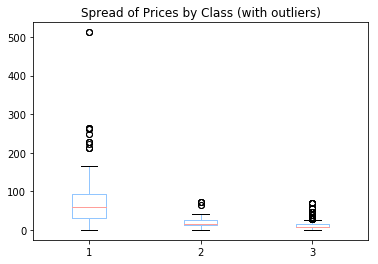

In [15]:
titanic_data.pivot(columns='Pclass', values='Fare') \
            .plot(kind='box')
plt.title('Spread of Prices by Class (with outliers)')
plt.savefig('figures/class_price_spread_w_outliers.png')

Median of 1: 60.287499999999994
Median of 1: 60.287499999999994
Median of 2: 14.25
Median of 3: 8.05


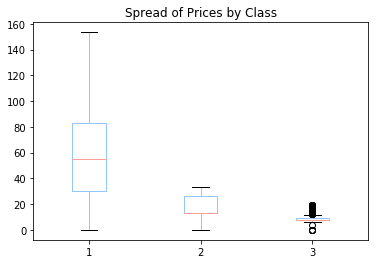

In [16]:
def remove_outliers(series):
    iqr = series.quantile(0.75) - series.quantile(0.25)
    median = series.quantile(0.5)
    bools = (series > median - 1.5 * iqr) & (series < median + 1.5 * iqr)
    print('Median of {}: {}'.format(series.name, median))
    return series[bools]
titanic_data.pivot(columns='Pclass', values='Fare') \
            .apply(remove_outliers) \
            .plot(kind='box')
plt.title('Spread of Prices by Class')
plt.savefig('figures/class_price_spread.png')

Maybe something to do with the deck they are on?

Median of A: 35.5
Median of A: 35.5
Median of B: 80.0
Median of C: 83.475
Median of D: 53.1
Median of E: 45.18125
Median of F: 13.0
Median of G: 13.58125
Median of No Info: 10.5
Value  of T: 35.5


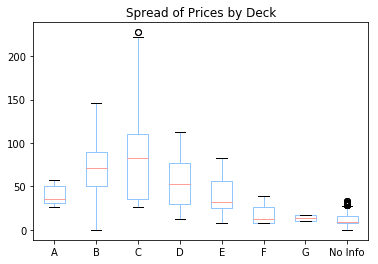

In [17]:
(titanic_data.assign(Deck=lambda x:
                    x['Cabin'].apply(to_deck))
            .pivot(columns='Deck', values='Fare')
            [list('ABCDEFG') + ['No Info']]  # Remove T because only one value
            .apply(remove_outliers)
            .plot(kind='box'))
print('Value  of T: {}'
      .format(titanic_data.loc[titanic_data['Cabin'] == 'T', 'Fare']
             .iloc[0]))
plt.title('Spread of Prices by Deck')
plt.savefig('figures/deck_price_spread.png')

How about ports because I want to mix things up with a line graph

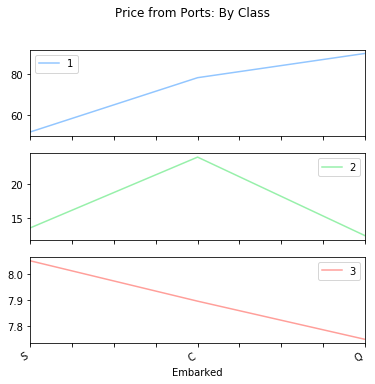

In [18]:
(titanic_data.groupby(['Embarked', 'Pclass'])
            ['Fare'].median()
            .unstack(level=1)
            .reindex(list('SCQ'))
        .plot(subplots=True, figsize=(6, 6)))
plt.gcf().suptitle('Price from Ports: By Class')
plt.gcf().savefig('figures/price_from_ports.png')